Przewidywanie i utrzymywanie odpowiedniego stanu magazynowego produktów  
==============

**Autorzy:** *Dworaczyk Marek* i *Czech Piotr*

<br><br>

# Spis treści

1. [Wprowadzenie](#wprowadzenie)
    * [Motywacja](#motywacja)
    * [Sformułowanie problemu](#sformułowanie-problemu)
2. [Zerowy czas dostawy, $\tau = 0$](#zerowy-czas-dostawy)
3. 

<br><br>

# Wprowadzenie

## Motywacja

Przedmiotem naszych badań został magazyn, czyli serce całego organizmu dostaw i podstawa logistyki. Jest on miejscem kluczowym i elementarnym przy kupowaniu, wysyłaniu czy dostarczaniu jakichkolwiek produktów. Na łamach tej pracy chcielibyśmy się przyjrzeć politykom uzupełnien magazynu oraz czynnikom, które wpływają na stan magazynowy produktu. Zrobimy to wszystko, aby końcowo przedstawić matematyczną propozycję, jak utrzymywać odpowiedni stan magazynowy produktu. Wiemy, że w tej dziedzinie każda godzina ma znaczenie, dlatego odpowiednie planowanie dostaw i zamówień - tak aby odpowiednie produkty zawsze były w określonym stanie, ma olbrzymie znaczenie - bo często nie mówimy tu o godzinach opóźnień, ale <i>dniach</i>.
<br>

Całość naszej pracy rozpoczeniemy od próby matematycznego opisania czynników wpływających na stan produktu. Dodatkowo w tak skomplikowanych środowiskach logistycznych, jak magazyn, ważnym czynnikiem jest też dobranie odpowiedniej strategii uzupełnień i planowania dostaw, aby nie zamawiać wszystkiego na przysłowiowe <i>hura</i>. Poruszymy zatem po krótce polityki uzupełnień magazynu, w tym wybrany przez nas schemat, aby praca ta była dla czytelnika maksymalnie klarowna odnośnie poruszanej zawartości.
<br>

Naszym celem będzie stopniowe analizowanie bardziej złożonego problemu i wzięcie pod uwagę trafniej dostosowanych parametrów równania. Natomiast zaczniemy od najprostrzego ujęcia problemu. To, co uważamy za istotne to nie stworzenie długiego i przekomplikowanego modelu, a znalazienie schematu, który pozwoli nam <i>dostatecznie dobrze</i> przybliżać oczekiwane przez nas wartości. 
<br>

Naukowym punktem wyjścia została dla nas praca autorstwa Arpad Gy. T. Csik, Tamas L. Horvath i Peter Foldesi pod tytułem "An Approximate Analytic Solution of the Inventory Balance Delay Differential Equation", która pomogła nam dostrzeć oraz zrozumieć podstawowe problemy i zagadnienia podczas poruszania się w temacie planowania dostaw na magazynie. Sama praca jest również analizą różnych podejść do tego samego problemu, dlatego zaciekawionych zachęcamy do źródła.
<br>

## Sformułowanie problemu

### Zwiększanie stanu

Magazyn kojarzy nam się pierwszorzędnie z <i>przechowywaniem</i> wskazanych rzeczy. Na moment pisania tej pracy teleportacja jeszcze nie jest możliwa, a więc aby przedmiot pojawił się w magazynie, musi być: zamówiony i przyjęty. Mówiąc <i>"przyjęty"</i>, tak naprawdę cicho założyliśmy jeszcze jeden czynnik - ten produkt musi być dostarczony, co kolejno prowadzi nas do konkluzji, że każdy towar ma <b>pewien czas dostawy $\tau$</b>. Podsumowując, określimy sobie pewną funkcję R (receive):

$$
\tag{1}
R = R(t) : t \in [0, \infty),
$$ 

która będzie informować nas o wielkości dostawy w dowolnie podanej chwili $t$. Wracając do wyszczególnionego procesu:
1. zamówienie
2. dostarczanie
3. przyjęcie

funkcja $R$ określiła nam proces przyjęcia. Zdefiniujmy teraz proces <i>zamówienia</i>:

$$
\tag{2}
O = O(t) : t \in [0, \infty).
$$

Dzięki tym definicjom i wykorzystaniu brakującego etapu dostarczania - który zajmuje czas, ponieważ kurier musi do nas dotrzeć, opisujemy proces dostaw następująco: 

$$
\tag{3}
R(t) = O(t - \tau) : t,\tau \in [0, \infty)
$$

<i>tutaj zrobie obrazek w figmie z osią czasu, żeby to ładniej pokazać</i> 

Takie zabiegi pozwoliły nam opisać sytuację życiową: jeśli przykładowo $\tau = 2\ [dni]$ to zamawiając w poniedziałek ($t=1$) 16 sztuk towaru $O(1) = 16$ to dopiero w środę ($t=3$):

$$
R(3) = O(t - \tau) = O(3 - 2) = O(1) = 16,
$$

odnujemy zwiększenie się towaru na podstawie poniedziałkowego zamówienia.

### Zmniejszanie stanu

Nasz towar na magazynie zmniejszy się tylko w momencie, gdy znajdzie się na niego chętny i go zamówi. Jest to sytuacja prostsza, bo nas jako zarządzających i odpowiadających za stan produkt na tym etapie nie interesuje <i>ile towar będzie dostarczany do klienta</i>. Ważne jest dla nas ile sztuk musimy wydać dzisiejszego dnia z magazynu zatem, określimy sobie funkcję D (demand):

$$
\tag{4}
D = D(t) : t \in [0, \infty).
$$

Dla uproszczenia w pierwotnym schemacie przyjmiemy, że częstotliwość zamówien jest stała każdego dnia, a więc:

$$
\begin{equation}
\tag{5}
D(t) = \begin{cases} 
      0 & \text{dla } t \lt 0 \\
      D_0 & \text{dla } t \geq 0 
   \end{cases},\ \text{gdzie } D_0 \in \mathbb{N}.
\end{equation}
$$


### Równanie zmiany stanu

Zdefiniowaliśmy dwa niezbędne i podstawowe procesy: wydawanie i przyjęcie. Do opisania świata brakuje nam tylko definicji <i>ile my tak naprawdę tego towaru mamy</i>. Zatem, chcielibyśmy określić funkcję I (inventory):

$$
I = I(t) : t \in [0, \infty),
$$

która wskazuja nam ilość produktu na magazynie - jego <b>stan magazynowy</b>. Dodatkowo, nie zakładamy, że podczas analizy nasz magazyn musi być na starcie pusty, ponieważ w realnym świecie cięzko, abyśmy najpierw opróżnili cały magazyn a później starali się wprowadzić nowe procesy - musi to być jak najbardziej możliwe płynne przejście, zatem definiujemy warunek początkowy:

$$
\tag{6}
I(0) = I_0 : I_0 \in \mathbb{N} \cup \{0\}.
$$

Dzięki temu możemy teraz opisać cały ten proces, równanie opisujące zmiane stanu magazynowego produktu:

$$
\begin{equation} 
\tag{7}
\frac{dI}{dt} = R(t) - D(t) : t \in [0, \infty),
\end{equation}
$$

danego dnia nasz stan magazynowy powiększy się o towar przyjęty, a zmniejszy się o towar wysłany.

### Polityka uzupełnień

Zanim natomiast zdecydujemy się zapisać w kodzie powyższe równanie musimy przyjąć strategię działania funkcji $O(t)$, ponieważ na ten moment jest to nasza jedyna niewiadoma. Tak, jak wspominaliśmy na początku technik i polityk uzupełniania magazynu jest wiele. 
Można by wspomnieć o polityce Reorder-point <i>(tu może być dodany odnośnik)</i>, która polega na składaniu zamówień uzupełniających stan magazynu w chwili kiedy spadnie on poniżej określonego poziomu. Dla nas nie byłaby to dobra polityka do przyjęcia, gdyż uzupełnienia byłyby składane w różnych odstępach czasowych co utrudniałoby dokładną analizę i symulację.

Bardziej odpowiednim sposobem zarządzania magazynem jest tzw. Periodic-review <i>[tu będzie dodany odnośnik]</i>, gdzie za taktykę przybiera się okresowe sprawdzanie stanu magazynu
i domawianie takiej ilości produktu, ile brakuje by osiągnąć nasz oczekiwany stan zwany <i>safety-stock</i>, u nas określony jako $I_t \in \mathbb{N}$. Naszą wspomnianą już funkcję $O(t)$ możemy zatem określić jako:

$$
\begin{equation}
\tag{8}
O(t)=\frac{I_t - I(t)}{T} 
\end{equation}
$$
gdzie wartość $T \in \mathbb{N}$ jest tak zwanym kontrolerem, lub "czasem regulacji". Jest on użyty z tego powodu, że zamówienie całego deficytu w jednym okresie czasowym może być nieefektywną praktyką [Disney, Naim and Towill 2000].



### Podsumowanie

W tym momencie potrafimy już podstawowo opisać świat magazynu, który nas otacza:

<i> tu zrobie grafike w figmie jak sie uda </i>

zatem przypomnijmy sobie nasze komponenty i przenieśmy je do kodu:
* $I(t)$ - <i>inventory value</i> - stan magazynowy w chwili $t$,
* $D(t)$ - <i>demand rate</i> - wielkość zamówień w chwili $t$,
* $O(t)$ - <i>orders rate</i> - ilość zamówionych sztuk produktu w chwili $t$,
* $R(t)$ - <i>receive rate</i> - ilość otrzymanych sztuk produktu w chwili $t$.

In [ ]:
I₀ = 0 # inital inventory value
Iₜ = 0 # target inventory value
τ = 0 # delay rate
T = 1 # relaxation factor

D(t) = t < 0 ? 0 : D₀ # demand rate function
O(t) = (I₀ - I(t)) / T # orders rate function
R(t) = O(t - τ) # receive rate function

# change of inventory level function 
function dI(t)
    R(t) - D(t)
end

# Zerowy czas dostawy, $\tau = 0$

## Zauważmy! 

Zgodnie z przyjętą ideą rozpoczniemy od maksymalnego uproszczenia naszego schematu. W takim przypadku uznajemy, że znaleźliśmy firmę kurierską z <a href="https://www.post.japanpost.jp/service/you_pack/current_day_en.html">przyszłości</a>, która pozwala nam dostarczać zamówiony towar od ręki, tzn. nie posiadamy opóźnienia dostawy zatem $\tau = 0$.

W takim podejściu nasz <i>receive rate</i> staje się jednoznaczny z <i>orders rate</i>, co możemy prosto wyrazić zapisem:

$$
\tag{9}
R(t) = O(t - 0) = O(t) : t \in [0, \infty).
$$

Dodatkowo dzięki naszej przełomowej firmie kurierskiej nasza funkcja $D$ nigdy nie musi obsługiwać przypadku $t \lt 0$

$$
\tag{10}
D(t) = D_0.
$$

Cała sytuacja staje się dla nas o tyle ważna i ciekawa, że przy wybranej przez nas polityce uzupełnień przekształca to równanie (7) do następującej postaci:

$$
\begin{align*}
\frac{dI}{dt} &= R(t) - D(t) \\
&= O(t) - D_0 \\
&= \frac{I_t - I(t)}{T} - D_0.
\tag{11}
\end{align*}
$$

Sytuacja jest fantastyczna! Cały nasz problem w tym momencie sprowadził się do równania różniczkowego 1 rzędu.

Dzięki temu na ten moment posiadamy równanie zwyczajne pierwszego rzędu, któremu chcielibyśmy przyjrzeć się trochę bliżej. Przyjęty przez nas plan działania jest następujący:
1. spróbujemy rozwiązać problem numerycznie za pomocą algorytmów Eulera (forward i back)
2. spróbujemy rozwiązać problem numerycznie z pomocą algorytmu 4
3. rozwiążemy równanie analitycznie oraz przyjrzymy się trochę charakterystyce rozwiązania
4. porównamy otrzymane rowiązania numeryczne z analitycznym


## Podejście numeryczne

### Metoda Eulera

Pierwszym narzędziem, które wykorzystamy do walki z otrzymanym równaniem (11) będą metody Eulera. Służą one do rozwiązywania równań różniczkowych postaci

$$
\tag{12}
\frac{dy}{dx} = f(x,y) \text{, gdzie } y(x_0) = y_0
$$

gdzie $y(x_0)$ jest warunkiem początkowym (przypis).<br>

Następnie wprowadzamy pewną siątkę podziału $ x_n = nh $, gdzie $h \gt 0$.

Dzięki nałożeniu tej siatki oraz użyciu paru przybliżeń w metodzie jawnej Eulera otrzymujemy rekurencyjny wzór na kolejne wartości $y$.

$$
\tag{13}
y_n = y_{n - 1} + hf(x_{n - 1}, y_{n - 1}).
$$

Poniższa grafika w świetny sposób pokazuje jak zwiększanie elementu $h$ prowadzi do dokładniejszego działania metody:

<center>
<img src="https://phys23p.sl.psu.edu/~mrg3/mathanim/diff_equ/stepeuler.gif">
</center>

(https://phys23p.sl.psu.edu/~mrg3/mathanim/diff_equ/eulera.html)

Istnieje również niejawna metoda Eulera, która wyraża się następująco:

$$
\tag{14}
y_n = y_{n - 1} + hf(x_n, y_n).
$$

podstawowa róznica między tymi sposobami jest taka, że wartości w tej pierwszej liczmy <i>w przód</i>, natomiast w metodzie niejawnej - <i>wstecz</i>.


#### Jawna

Zaczniemy od implementacji jawnej metody eulera. Zgodnie z powyższymi definicjami (12) i (13) zaimplementujemy obliczanie kolejnych wartości y za pomocą funkcji:

In [17]:
"""
    solve_by_forward_euler(f::Function, y₀::Number, x₀::Int, xₙ::Int, h::Float64)

Solves an ordinary differential equation using the forward Euler method.

Parameters:
- `f`: Function representing the derivative function: y'(x) = f(x, y)
- `y₀`: Initial condition
- `x₀`: Lower bound for x, where x ∈ [x₀, xₙ]
- `xₙ`: Upper bound for x, where x ∈ [x₀, xₙ] 
- `h`: Step size

Returns:
- `x_values`: Array with x values corresponding to each step.
- `y_values`: Array with approximated values of the given function.
"""
function solve_by_forward_euler(
    f::Function,
    y₀::Number,
    x₀::Int,
    xₙ::Int,
    h::Float64
)::Tuple{Vector{Float64}, Vector{Float64}}
    n = round(Int, (xₙ - x₀) / h)

    y_values = zeros(n + 1)
    x_values = zeros(n + 1)

    x_values[1] = x₀
    y_values[1] = y₀

    for index in 1:n
        x_values[index + 1] = x_values[index] + h
        y_values[index + 1] = y_values[index] + h * f(x_values[index], y_values[index])
    end

    return x_values, y_values
end

solve_by_forward_euler

Przy implementacji zdecydowaliśmy się na to, aby funkcja umożliwiała rozwiązanie funkcji dla dowolnego zakresu od $x \in [x_0, x_n]$. Następnie po podaniu funkcji $f$, parametru początkowego, parametru $h$ oraz granic zakresu dla wartości $x$ implementujemy właściwy algorytm. Początkowo wyliczamy liczbę do przejścia po naszej "siatce", tworzymy na jej podstawie 2 nowe puste tablice ze wskazaną długością - jedna dla zapamiętywania argumentów $x$, druga dla wartości $y$. W ostatnim etapi w ramach implementacji zdecydowaliśmy się <i>przesunąć</i> o jeden indeks do przodu względem pierwotnej formuły

$$
\tag{15}
y_{k + 1} = y_{k} + hf(x_{k}, y_{k}) \text{, gdzie } k = n - 1
$$

<br>

Pozostało sprawdzić owoce zaimplementowanej funkcji na przykładzie naszego modelu, przypomnijmy zatem równanie (7):

$$
\tag{16}
\frac{dI}{dt} = \frac{I_t - I(t)}{T} - D_0 \text{, gdzie } I_t,\ T,\ D_0 \in \mathbb{N}.
$$

W ramach schematu Eulera powyższe równanie zmieniamy tak, aby zależne było od $I$ oraz $t$

$$
\tag{17}
f(t, I) = \frac{I_t - I}{T} - D_0,
$$

co przekłada się na równoznaczny zapis w Julii:


In [2]:
"""
    get_f(Iₜ, T, D₀)

Returns a f(t, I) function of our inventory model equation.

Parameters:
- `Iₜ`: Target value.
- `T`: Order policy controller value
- `D₀`: Delivery constant.

Returns:
- A function f(t, I)
"""
function get_f(Iₜ::Int, T::Int, D₀::Int)::Function
    return (t, I) -> ((Iₜ - I) / T) - D₀
end


get_f

W powyższej implementacji wykorzystaliśmy paradygmat closures programowania funkcyjnego. Głównym powodem było wymaganie, aby wszystkie używane przez nas stałe były zawsze zrozumiałe i nie powodowały konfliktu z zasięgiem zmiennych. Dodatkowo, aby móc korzystać z dość abstrakcyjnie zdefiniowanej funkcji `solve_by_forward_euler` nie chcieliśmy sztucznie dodawać parametrów do funkcji $f$. Ten zapis jak i paradygmat pozwala nam pogodzić nasze wymagania matematyczne wraz z przejrzystą i poprawną implementacją programistyczną.

<br>

Uf... najcięższe chyba za nami zatem przejdźmy do konkretów - hurtowo sprzedajemy czarne skarpety z bawełny. Początkowo na magazynie posiadamy ich 20, na jednostkę czasu sprzedajemy ich 12 (tak, są to świetne skarpety). Z racji, że dopiero rozpoczynamy nasz świetny biznes, wszystko trzymamy w garażu gdzie miejsce jest ograniczony, więc maksymalnie możemy upakować 30 skarpetek. Kontroler w polityce uzupełnień ustawimy w tym momencie na 2 (w dalszej części poznamy skutki tego wyboru!). Więc do dzieła:

In [20]:
I₀ = 20 # socks on start 
D₀ = 12 # demand on our socks
Iₜ = 30 # stock inventory limit
T = 2 

f = get_f(Iₜ, T, D₀)

#9 (generic function with 1 method)

Przekuliśmy w tym momencie fakty otrzymane od klienta w zaimplementowany model, który teraz możemy spróbować przybliżyć dla pierwszych 15 dni sprzedaży:

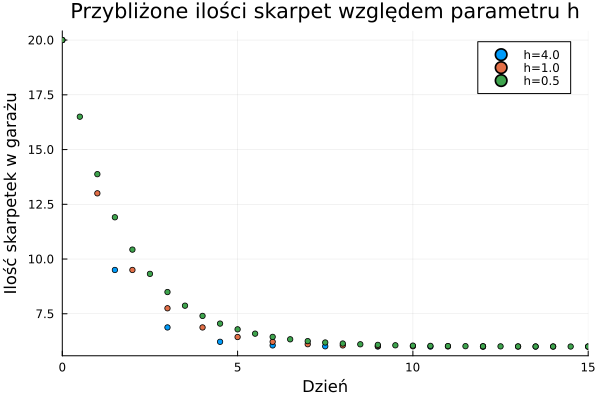

In [32]:
using Plots

day_start = 0
day_end = 15

x_values_h1, y_values_h1 = solve_by_forward_euler(f, I₀, day_start, day_end, 1.5)
x_values_h2, y_values_h2 = solve_by_forward_euler(f, I₀, day_start, day_end, 1.0)
x_values_h3, y_values_h3 = solve_by_forward_euler(f, I₀, day_start, day_end, 0.5)

scatter(x_values_h1, y_values_h1, label="h=4.0", markersize=3, xlabel="Dzień", ylabel="Ilość skarpetek w garażu", title="Przybliżone ilości skarpet względem parametru h", grid=true, xlims=(day_start, day_end))
scatter!(x_values_h2, y_values_h2, label="h=1.0", markersize=3)
scatter!(x_values_h3, y_values_h3, label="h=0.5", markersize=3)

Sukces! Na tym etapie możemy poczynić dodatkową obserwację, parametr $h$ ma ogromne znaczenie dla dokładności naszego rozwiązania numerycznego

#### Niejawna

Przypomnij schemat (nr AS DASD) na wyznaczanie kolejnych przybliżeń w metodzie niejawnej.

$$
\tag{18}
y_n = y_{n - 1} + hf(x_n, y_n).
$$

Od razu widzimy, że wyrażenie to jest trochę bardziej wymagające, ponieważ wyznaczając element $y_n$ pojawia się on również po prawej stronie. Trudniej nam tutaj od razu zaimplementować abstrakcyjne podejście, tak jak zrobiliśmy to przy funkcji `solve_by_forward_euler`, ale nie jest to przeszkoda, która nas powstrzyma. Użyjmy tego schematu do naszego równania, mamy więc

$$
\tag{19}
I_n = I_{n - 1} + hf(t_n, I_n) \text{, gdzie } f(t, I) = \frac{I_t - I}{T} - D_0 
$$

Podstawiamy zatem rezultat naszej funkcji f dla parametrów $t_n$ oraz $I_n$ i otrzymujemy

$$
\tag{20}
I_n = I_{n - 1} + h \cdot (\frac{I_t - I_n}{T} - D_0)
$$

Ta wersja jest dla nas dogodniejsza, ponieważ prostymi przekształceniami algebraicznymi możemy uzyskać $I_n$ tylko po jednej stronie równania. Zatem dokonajmy paru transformacji, pamiętajac o naszym celu - czyli $I_n$ na jedną stronę równania.

Rozpoczynamy od mnożenia obustronnie przez $T$ i przeniesienie czynnika $I_n$

$$
TI_n = TI_{n - 1} + hI_t - hI_n - hTD_0
$$

$$
TI_n + hI_n = TI_{n - 1} + hI_t - hTD_0.
$$

Wyciągamy wspólne czynniki przed nawias

$$
I_n(T + h) = TI_{n - 1} + h(I_t - TD_0)
$$

Co pozwala zrealizować nasz pierwotny cel

$$
I_n = \frac{T \cdot I_{n - 1} + h(I_t - TD_0)}{T + h} \text{, gdzie } h \in [0, \infty), \ D_0,T,I_t \in \mathbb{N}.
$$

Dla uproszczenia implementacji algorytmu ponownie skorzystamy z podstawienia $k = n - 1$ otrzymując

$$
\tag{21}
I_{k + 1} = \frac{T \cdot I_{k} + h(I_t - TD_0)}{T + h}
$$

Zauważmy, że możemy podejść do tego trochę bardziej abstrakcyjnie

$$
\tag{22}
I_{k + 1} = \frac{T}{T + h}I_{k}  +  \frac{(I_t - TD_0)}{T + h}h,
$$

czyli

$$
\tag{23}
I_{k + 1} = {A}I_{k} + {B} \text{, gdzie } {A}, {B} \in \mathbb{R}.
$$

Zaimplementujmy zatem funkcję `solve_by_backward_euler` na podstawie tych wniosków


In [7]:
"""
    solve_by_backward_euler(f::Function, y₀::Number, x₀::Int, steps::Int, A::Number, B::Number)

Solves an ordinary differential equation using the backward Euler method.

Parameters:
todo

Returns:
- `x_values`: Array with x values corresponding to each step.
- `y_values`: Array with approximated values of the given function.
"""
function solve_by_backward_euler(
    f::Function,
    y₀::Number,
    x₀::Int,
    n::Int,
    A::Number,
    B::Number,
)::Tuple{Vector{Float64}, Vector{Float64}}
    y_values = zeros(n + 1)
    x_values = zeros(n + 1)

    x_values[1] = x₀
    y_values[1] = y₀

    for index in 1:n
        x_values[index + 1] = x_values[index] + h
        y_values[index + 1] = A * y_values[index] + B
    end

    return x_values, y_values
end

solve_by_backward_euler

Minusem tego rozwiązania jest to, że musimy zadbać o to, aby w innej metodzie poprawnie wyliczyć wartość kroków `n` na podstawie dobranego przez nas parametru $h$. Zaimplementuj zatem funkcję do tego zadania. Dodatkowo niech wyliczy ona nam od razu wartości $A$ oraz $B$. 

In [14]:
"""
todo
"""
function get_constants_to_backward_euler(
    x₀,
    xₙ,
    h
)::Tuple{Int, Float64, Float64}
    A = T / (T + h)
    B = ((Iₜ - T * D₀) * h) / (T + h)

    n = round(Int, (day_end - day_start) / h)

    return n, A, B
end

get_constants_to_backward_euler

Sprawdźmy zatem jak to wszystko działa na identycznym przykładzie, co w metodzie jawnej.

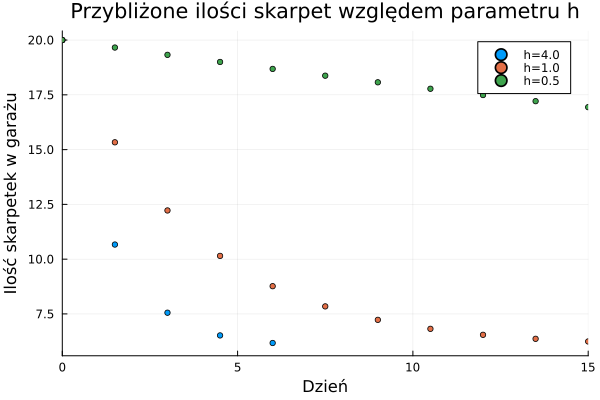

In [18]:
## Conditions like in forward euler
I₀ = 20 # socks on start 
D₀ = 12 # demand on our socks
Iₜ = 30 # stock inventory limit
T = 2 

f = get_f(Iₜ, T, D₀)

using Plots

day_start = 0
day_end = 15

x_values_h1, y_values_h1 = solve_by_backward_euler(f, I₀, day_start, get_constants_to_backward_euler(day_start, day_end, 4.0)...)
x_values_h2, y_values_h2 = solve_by_backward_euler(f, I₀, day_start, get_constants_to_backward_euler(day_start, day_end, 1.0)...)
x_values_h3, y_values_h3 = solve_by_backward_euler(f, I₀, day_start, get_constants_to_backward_euler(day_start, day_end, 0.5)...)

scatter(x_values_h1, y_values_h1, label="h=4.0", markersize=3, xlabel="Dzień", ylabel="Ilość skarpetek w garażu", title="Przybliżone ilości skarpet względem parametru h", grid=true, xlims=(day_start, day_end))
scatter!(x_values_h2, y_values_h2, label="h=1.0", markersize=3)
scatter!(x_values_h3, y_values_h3, label="h=0.5", markersize=3)

### Metoda 4

## Podejście analityczne

### Rozwiązanie

### Charakterystyka rozwiązania

## Porównanie

# Niezerowy czas dostawy, $\tau \gt 0$

Sytuacja zmienia się kiedy istnieje niezerowy czas dostawy, ponieważ wtedy nasze równanie opisujące zmianę stanu magazynu staje się równaniem różniczkowym z opóźnieniem. 

## Przybliżone rozwiązanie analityczne

### Określenie ram czasowych

Określimy jaka jest sytuacja dla danych interwałów i ram czasowych.

Dla $t \lt 0$ zapiszemy stan naszego magazynu jak następuje:
$$
\tag{24}
R(t) = D(t) = 0 \\
I(t) = I_0
$$
Przyjmujemy, że żadne zamówienia nie są składane jak i nie ma żadnych zapotrzebowań. W magazynie znajduje się też określona już przez nas ilość towaru.

W chwili $t=0$ zmienia się zapotrzebowanie i od tego momentu mamy $D(t) = D_0 $. Zaś do chwili $t=\tau$ żadne uzupełnienia nie są dostarczone do magazynu co wynika z (3). Nasze równanie (7) opisujące zmianę stanu magazynu w chwilach $0 \le t \lt \tau$ przyjmuje postać:
$$
\tag{25}
\frac{dI}{dt} = R(t) - D(t) = 0 - D_0 = -D_0
$$

Dla $\tau \le t$ sytuacja zmienia się znowu, gdyż wreszcie zmienia się także $R(t)$, i nasz wzór można zapisać jako:
$$
\begin{align*}
\frac{dI}{dt} &= R(t) - D(t) \\ 
              &= O(t-\tau) -D_0\\
\tag{26}
              &= \frac{I_t - I(t - \tau)}{T} - D_0,\text{ gdzie } t \in [\tau, \infin)
\end{align*}
$$
Przenosząc zmienne zależna na lewą stronę równania, a stałe na prawą otrzymamy:
$$
\tag{27}
\frac{dI}{dt} + \frac{I(t - \tau)}{T} = \frac{I_t}{T} - D_0
$$

### Rozwiązanie dla $t \in [0,\tau)$
Rozwiążemy równanie (25) poprzez obustronne nałożenie całki

$$
\int \frac{dI}{dt} = \int -D_0
$$

$$
\int dI = \int -D_0\ dt
$$

$$
I(t) = D_0t + C, C \in \mathbb{R}
$$

podstawiając warunek początkowy  $I(0) = I_0$ 

$$
\tag{28}
I(t) = I_0 - D_0t,\text{ gdzie } t \in [0, \tau)
$$

Tę funkcję nazwiemy <i>przedinterwałową</i> i jest ona naszym warunkiem początkowym dla rozwiązania ogólnego, bazując się na [odnośnik do pdf z rozwiązaniem dde].Zapiszemy ją jako:
$$
\tag{29}
\phi(t) = I_0 - D_0t,\text{ gdzie } t \in [0, \tau)
$$

### Rozwiązanie dla $t \in [\tau, \infin)$
Aby rozwiązać (27) posłużymy się metodą nieznanych współczynników

Na początek znajdziemy ogólne rozwiązanie równania jednorodnego

$$
\tag{30}
\frac{dI(t)}{dt} + \frac{I(t-\tau)}{T} = 0
$$

zakładamy że rozwiązanie jest postaci 
$$
\tag{31}
I(t) = Ce^{st},\ \text{gdzie } C,\ s \in \mathbb{C}
$$

zatem podstawiając to do naszego równania różniczkowego otrzymujemy wielomian charakterystyczny:

$$
\begin{align*}
Cse^{st} + \frac{Ce^{s(t-\tau)}}{T}=0 \\
Ce^{st}(s+\frac{e^{-s\tau}}{T})=0\\
s+\frac{e^{-s\tau}}{T} = 0
\end{align*}
$$

mając je wykonamy kilka prostych algebraicznych przeształceń

$$
\begin{align*}
s = \frac{e^{-s\tau}}{T}\\
se^{{s\tau}} = \frac{1}{T}\\
\tag{32}
s\tau e^{{s\tau}} = \frac{\tau}{T}
\end{align*}
$$

Doprowadziliśmy do postaci gdzie możemy użyć funkcji W Lamberta: $W:\mathbb{C} \rightarrow \mathbb{C}$. Jest ona funkcją odwrotną do

$$
\tag{33}
f(w) = we^w\ ,\text{gdzie } w \in \mathbb{C} 
$$
Zatem zachodzi
$$
\tag{34}
W(z)e^{W(z)}=z ,\text{gdzie } z \in \mathbb{C}
$$

Takie równanie ma nieskończenie wiele rozwiązań w przestrzeni liczb zespolonych, każde oznaczone jako $W_k(z)$, gdzie $k \in \mathbb{Z}$ oznacza dane odgałęzienie rozwiązań. Porównując ze sobą wzory (32) i (34), wnioskujemy, że:
$$
\tag{35}
W_k(z) = s_k\tau \text{ oraz } z = -\frac{\tau}{T}
$$

To prowadzi nas do

$$
\tag{36}
s_k = \frac{W_k(-\frac{\tau}{T})}{\tau}
$$

Podstawiając to do (31)

$$
\tag{37}
I_k(t) = C_k e^{s_kt}
$$
Otrzymujemy zatem rozwiązanie naszego równania jednorodnego zależne od wybory gałęzi funkcji W Lamberta. $s_k$ jest znanym zespolonym współczynnikiem, zaś $C_k$ zespoloną stałą całkowania

Dla uproszenia przyjmiemy, że nasze rozwiązania należą do głównej gałęzi $W_0(z)$, co zostało uzasadnione w pracach Warburtona [odnośnik hehe], że jest to dostateczne przybliżenie do naszych praktycznych zastosowań. $W_0(z)$ przybiera tylko rzeczywiste wartości dla dowolnego $z$ co jest na naszą korzyść. Dalej zastosujemy następujące oznaczenia:

$$
W(z) = W_0(z) ,\quad s = s_0 ,\quad C = C_0
$$

Mamy więc określone $s$ do naszego jednorodnego rozwiązania:
$$
\tag{38}
I(t) = C e^{st} = C e^{\frac{W(-\tau/T)}{\tau}t},\ \text{dla } t \in [\tau, \infin)
$$

Mamy już rozwiązanie równania jednorodnego, więc potrzeba tylko szczególnego rozwiązania równania (29), które oznaczymy $I_p \in \mathbb{R}$. Wstępnie przyjmujemy, że jest ono takiej samej postaci jak prawa strona (29), czyli stała:

$$
\begin{equation}
\tag{39}
I_p = A,\ \text{gdzie } A \in \mathbb{R}
\end{equation}
$$

Rozwiązanie będące stałą jest już podane dla jednorodnego, zachodzi to jednak tylko dla t=0, a taki przypadek nas w tym momencie nie dotyczy. Możemy zatem podstawić to do równania (29):

$$
\frac{A}{T} = \frac{I_t}{T} - D_0
$$

$$
\tag{40}
A = I_t - D_0T
$$
Otrzymaliśmy zatem rozwiązanie szczególne

$$
\tag{41}
I_p = I_t - D_0T
$$


Mając ogólne rozwiązanie równania jednorodnego (38) jak i szczególne rozwiązanie niejednorodnego (41), możemy zapisać ogólne rozwiązanie równania (29) jako:

$$
\tag{42}
I(t) = I_t - D_0T + C e^{\frac{W(-\tau/T)}{\tau}t},\ \text{dla } t \in [\tau, \infin)
$$
Została nam tutaj jedynie do wyznaczenia stała całkowania $C \in \mathbb{C}$.

### Dopasowanie wyników
Chcemy teraz upewnić się że wszystko jest na swoim miejscu. Chcemy dopasować rozwiązanie (29) jak i rozwiązanie (42), które są w przedziałach odpowiednio $t \in [0,\tau)$ i $t \in [\tau,
\infin)$ tak aby były ciągle w punkcie $t=\tau$. Zadbamy również o zgodność na poziomie pierwszej pochodnej, aby zmiana też była ciągła.

Przypomnijmy sobie, że już w równaniu (7) uwzględniając równanie (3) określiliśmy jak ma wyglądać pochodna naszego wyniku w lewym i prawym przedziale od $t=\tau$.

$$
\frac{dI}{dt} = R(t) - D(t) = O(t - \tau) - D(t)
$$
Mamy więc
$$
\tag{43}
\lim_{t \to \tau^-} O(t - \tau) - D(t) = -D_0
$$
gdyż na przedziale $t \in [0,\tau)$ $O(t)=0$. Dalej

$$
\tag{44}
\lim_{t \to \tau^+} O(t - \tau) - D(t) = \lim_{t \to \tau^+} \frac{I_t - I(t-\tau)}{T} - D(t) = \frac{I_t - I(0)}{T} - D_0 = \frac{I_t - I_0}{T} - D_0
$$

Wiemy że dla $t \in [\tau,\infin)$ $O(t)$ ma już określoną wartość (8). Przyrównując do siebie obydwa równania zauważamy że pochodna będzie ciągła w punkcie $t=\tau$ jeśli $I_t= I_0$. W wielu przypadkach będziemy właśnie zaczynali od stanu magazynu który chcielibyśmy stale utrzymywać

Wrócmy do naszego otrzymanego wyniku. Określimy wartości jakie osiągają (29) i (42) zbiegając do $t=\tau$ odpowiednio z l
Wrócmy do naszego wyniku. Porównamy ze sobą lewostronną granicę (29) i prawo stronną granicę (42).

$$
\begin{split}
I_L &= \lim_{t \to \tau^-} I_0 - D_0t = I_0 - D_0\tau \\
I_R &= \lim_{t \to \tau^-} I_t - D_0T + C e^{\frac{W(-\tau/T)}{\tau}t} = I_t - D_0T + C e^{W(-\tau/T)}
\end{split}
$$
Porównując obie strony otrzymamy równanie z którego będziemy mogli określić stałą całkowania $C \in \mathbb{C}$
$$
\begin{split}
I_L &= I_R \\
I_0 - D_0\tau &= I_t - D_0T + C e^{W(-\tau/T)} \\
\end{split}
$$

